<a href="https://colab.research.google.com/github/Senai538/Bagging-Boosting-Project/blob/main/Bagging_and_Boosting_project_Senai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from scipy.stats import zscore
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/talking_data.csv')
df.head(30)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0


In [ ]:
df.shape

(100000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [ ]:
df.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [ ]:
df.isnull().values.any()

True

In [ ]:
df= df.drop(['attributed_time'],axis= 1)

In [ ]:
df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


In [ ]:
df.nunique()

ip               34857
app                161
device             100
os                 130
channel            161
click_time       80350
is_attributed        2
dtype: int64

In [ ]:
df['app'].value_counts(ascending=False)

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64

In [ ]:
frequent_apps=df.groupby('app').size().reset_index(name='count')
frequent_apps=frequent_apps[frequent_apps['count'] > frequent_apps['count'].quantile(0.2)]
frequent_apps=frequent_apps.merge(df,on='app',how='inner')
frequent_apps.head()

,app,count,ip,device,os,channel,click_time,is_attributed
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,0
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,0
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,0
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,0
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,0


In [ ]:
frequent_apps.shape

(99961, 8)

In [ ]:
frequent_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99961 entries, 0 to 99960
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   app            99961 non-null  int64 
 1   count          99961 non-null  int64 
 2   ip             99961 non-null  int64 
 3   device         99961 non-null  int64 
 4   os             99961 non-null  int64 
 5   channel        99961 non-null  int64 
 6   click_time     99961 non-null  object
 7   is_attributed  99961 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.9+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ip             100000 non-null  int64 
 1   app            100000 non-null  int64 
 2   device         100000 non-null  int64 
 3   os             100000 non-null  int64 
 4   channel        100000 non-null  int64 
 5   click_time     100000 non-null  object
 6   is_attributed  100000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 5.3+ MB


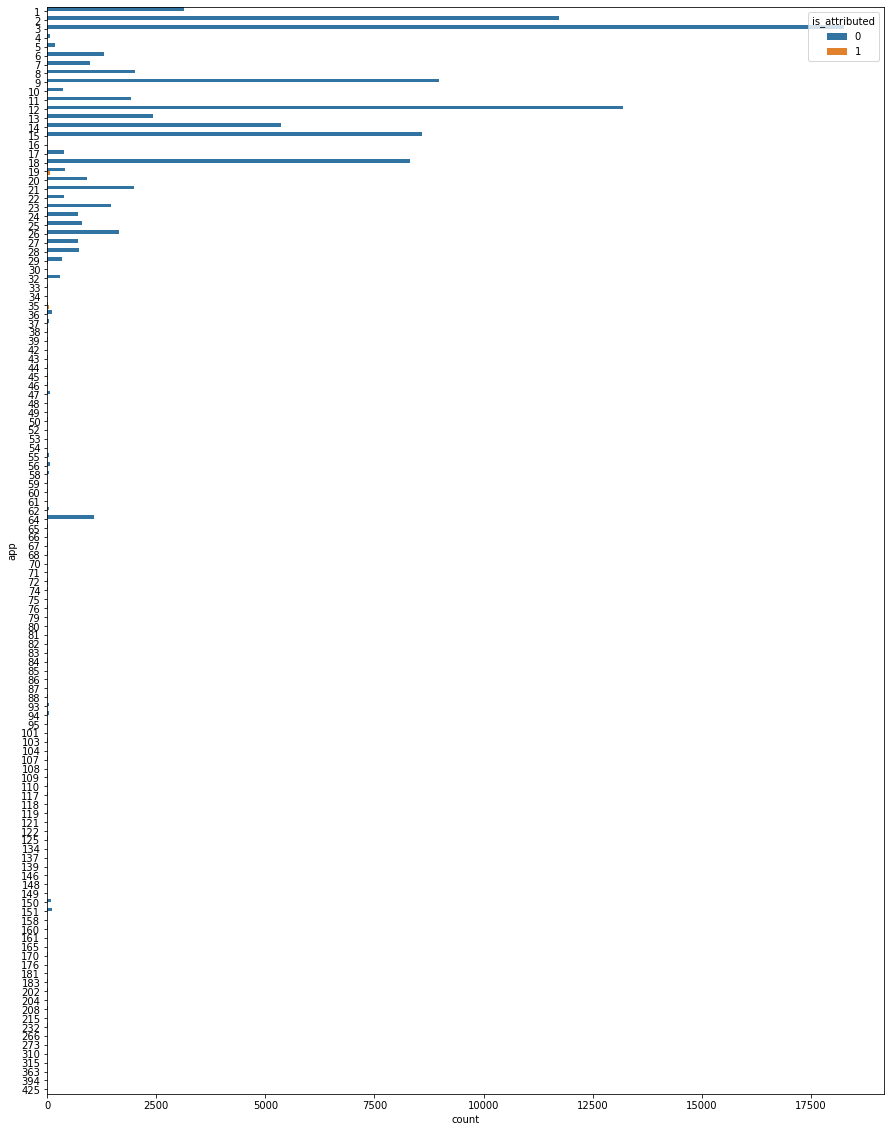

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (15,20))
sns.countplot(y="app", hue="is_attributed", data=frequent_apps);

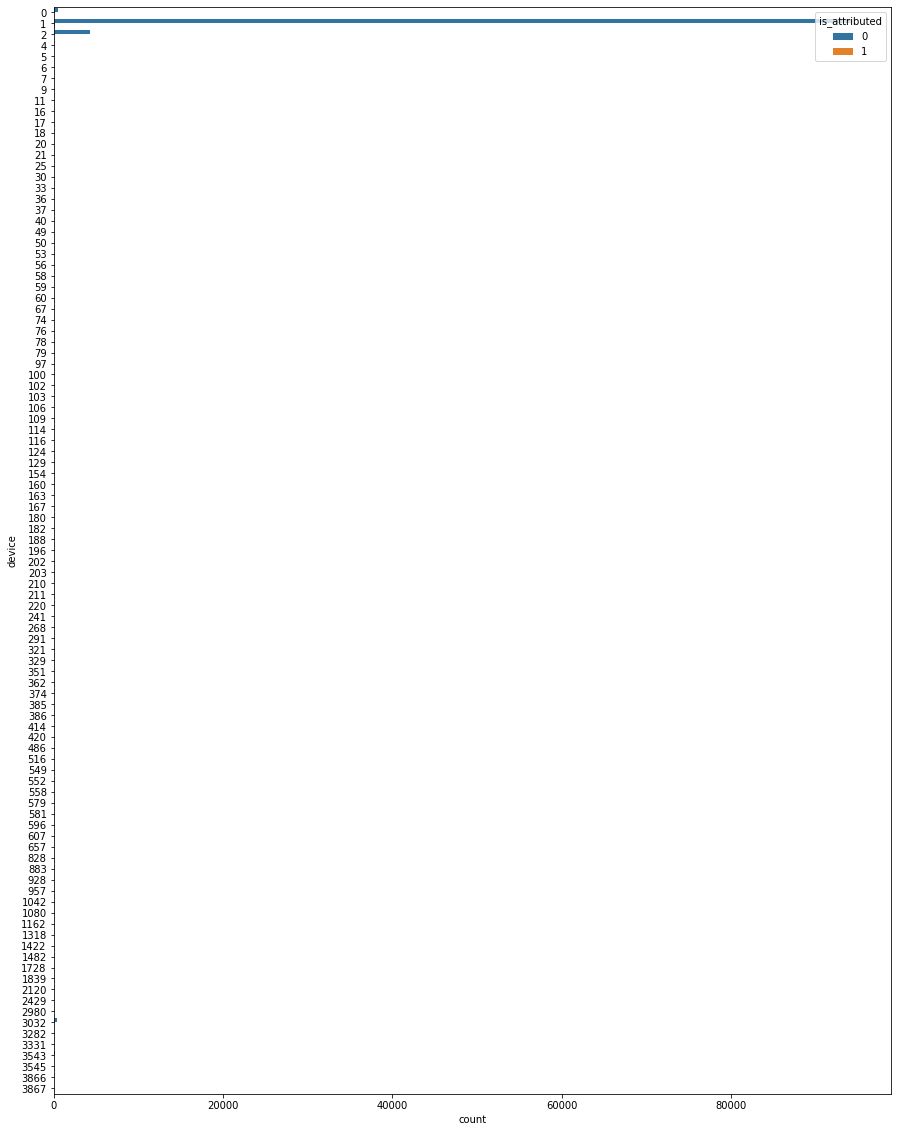

In [ ]:
plt.figure(figsize= (15,20))
sns.countplot(y="device", hue="is_attributed", data=frequent_apps);

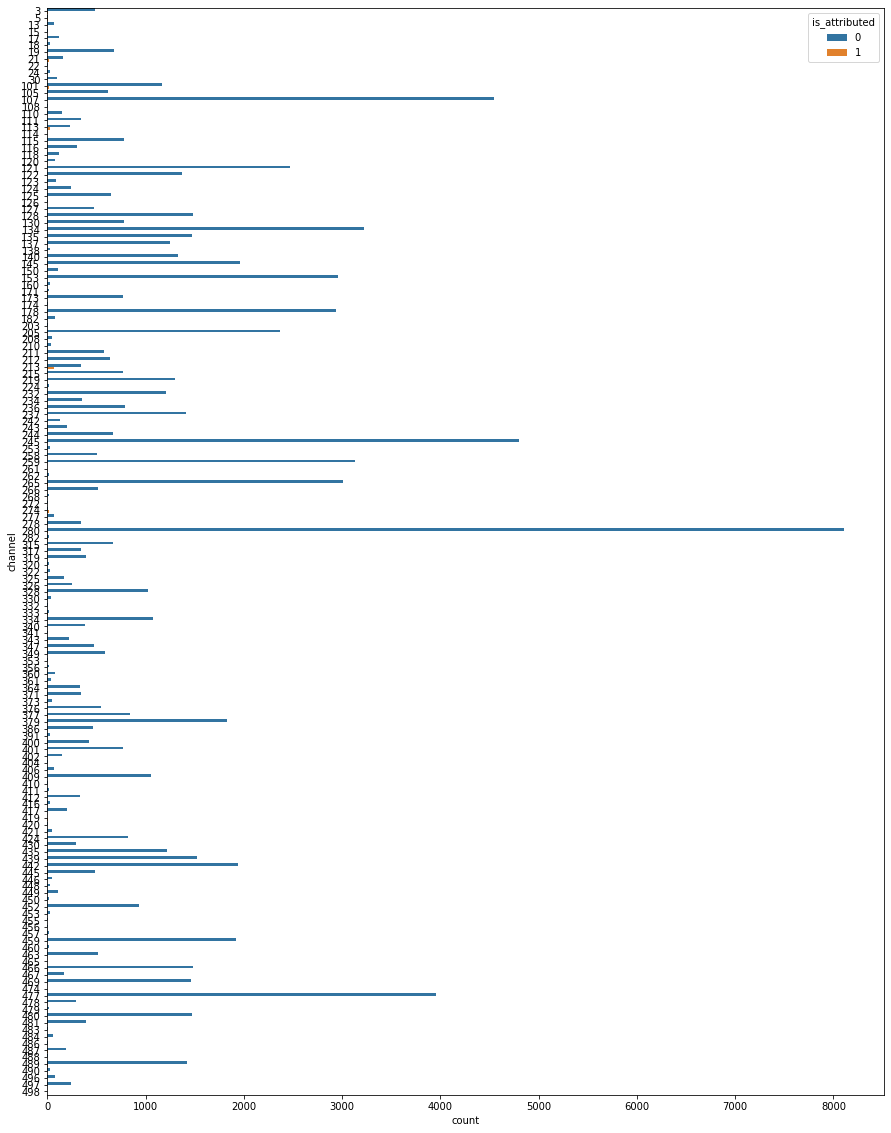

In [ ]:
plt.figure(figsize= (15,20))
sns.countplot(y="channel", hue="is_attributed", data=frequent_apps);

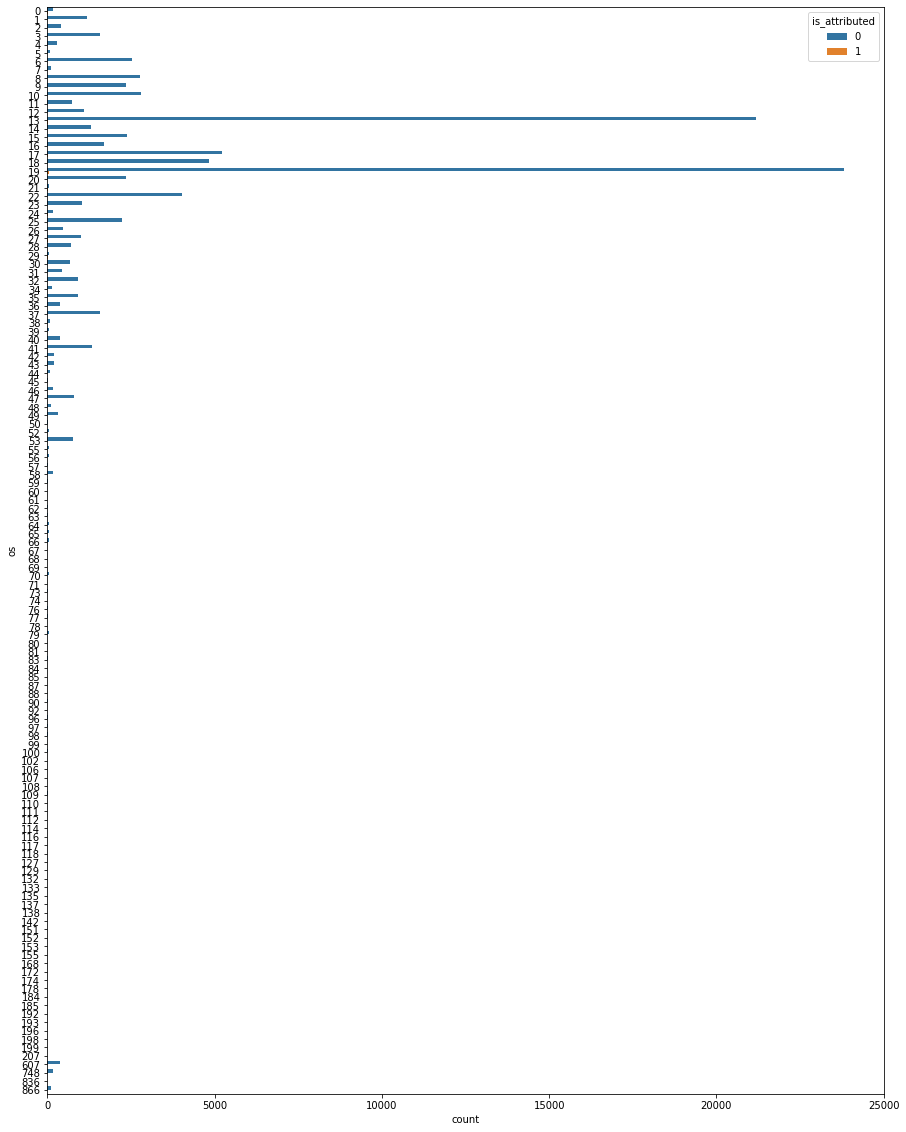

In [ ]:
plt.figure(figsize= (15,20))
sns.countplot(y="os", hue="is_attributed", data=frequent_apps);

In [ ]:
frequent_apps.head()

,app,count,ip,device,os,channel,click_time,is_attributed
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,0
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,0
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,0
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,0
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,0


In [ ]:
def time_features(frequent_apps):
    frequent_apps['datetime']=pd.to_datetime(frequent_apps['click_time'])
    frequent_apps['day_of_week']=frequent_apps['datetime'].dt.dayofweek
    frequent_apps['day_of_year']=frequent_apps['datetime'].dt.dayofyear
    frequent_apps['month']=frequent_apps['datetime'].dt.month
    frequent_apps['hour']=frequent_apps['datetime'].dt.hour
    return frequent_apps

In [ ]:
frequent_apps=time_features(frequent_apps)
frequent_apps.drop(['click_time','datetime'],axis=1,inplace=True)
frequent_apps.head()

,app,count,ip,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour
0,1,3135,17059,1,17,135,0,3,313,11,1
1,1,3135,52432,1,13,115,0,1,311,11,17
2,1,3135,89242,1,27,124,0,1,311,11,9
3,1,3135,123994,1,19,101,0,3,313,11,14
4,1,3135,34067,1,15,134,0,1,311,11,15


In [ ]:
X = frequent_apps.drop('is_attributed', axis=1)
y = frequent_apps[['is_attributed']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79968, 10)
(79968, 1)
(19993, 10)
(19993, 1)


In [ ]:
kf = KFold(n_splits = 3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier  
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight = {0:.5, 1:.5}, max_depth = 5, min_samples_leaf = 5)
rfcl

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
rfcl.fit(X_train, y_train)
rfcl.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
get_score(rfcl, X_train, X_test, y_train, y_test)

0.9977992297304057

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = y_pred[:,1] # keep the positives
y_pred

array([0.02349542, 0.00033126, 0.0003221 , ..., 0.01026252, 0.00015564,
       0.00019499], dtype=float32)

In [ ]:
ROC = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (ROC * 100.0))

AUC: 94.62%


In [ ]:
from sklearn.metrics import confusion_matrix
bgcl= model_cv.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score= bgcl.score(X_test, y_test)
print("The bagging classfier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.6min finished


The bagging classfier model accuracy is 0.9302664977510834
The confusion matrix of bagging classifier model is
[[19945     4]
 [   30    14]]


In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")

The Bagging classifier model accuracy is 0.9980493172610414
The confusion matrix of Bagging classifier model is
